## Ocena czasu potrzebnego na dekodowanie filmu (Online Video Characteristics and Transcoding Time)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

transcoding_mesurment = pd.read_csv('transcoding_mesurment.tsv', sep='\t')

## Analiza i przetwarzanie danych

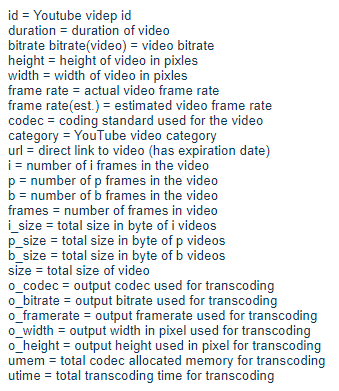

I-frame i P-frame to rodzaje klatek wideo w kodeku H.264, który jest jednym z najpopularniejszych kodeków wideo używanych do kompresji i dekompresji strumieni wideo.

<font color='red'>I-frame</font> (Intra-coded frame) to klatka, która zawiera pełny obraz i może być odtworzona bez potrzeby dostępu do innych klatek. Jest to podstawowa klatka w kodeku H.264 i jest używana do tworzenia nowych sekwencji wideo.

<font color='red'>P-frame</font> (Predicted frame) to klatka, która zawiera informacje tylko o zmianach obrazu w stosunku do poprzedniej klatki. P-frame jest mniej dokładny niż I-frame, ale pozwala na bardziej efektywną kompresję danych, ponieważ zawiera mniej informacji.

W kodeku H.264, I-frame i P-frame są używane w połączeniu, aby umożliwić skuteczną kompresję wideo i umożliwić odtwarzanie strumieni wideo z wysoką jakością obrazu.

<font color='red'>B-frame</font> (Bidirectional-predicted frame) to rodzaj klatki wideo w kodeku H.264, który jest jednym z najpopularniejszych kodeków wideo używanych do kompresji i dekompresji strumieni wideo. B-frame jest używany do zapisywania informacji o zmianach obrazu w stosunku do poprzedniej i następnej klatki.

B-frame jest bardziej skuteczny w kompresji danych niż P-frame, ponieważ zawiera informacje o zmianach obrazu w stosunku do dwóch klatek, a nie tylko jednej. Jednak B-frame wymaga dostępu do obu poprzedniej i następnej klatki, co może być trudne w przypadku strumieni wideo z dużą liczbą klatek.

In [2]:
transcoding_mesurment.head()

,id,duration,codec,width,height,bitrate,framerate,i,p,b,...,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,176,144,22508,0.612
1,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,320,240,25164,0.980
2,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,480,360,29228,1.216
3,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,640,480,34316,1.692
4,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,1280,720,58528,3.456


In [3]:
transcoding_mesurment.describe()

,duration,width,height,bitrate,framerate,i,p,b,frames,i_size,p_size,b_size,size,o_bitrate,o_framerate,o_width,o_height,umem,utime
count,68784.000000,68784.000000,68784.000000,6.878400e+04,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000,6.878400e+04,6.878400e+04,68784.0,6.878400e+04,6.878400e+04,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000
mean,286.413921,624.934171,412.572226,6.937015e+05,23.241321,100.868312,6531.692210,9.147854,6641.708377,2.838987e+06,2.218057e+07,0.0,2.502294e+07,1.395036e+06,21.190862,802.336357,503.825541,228224.717900,9.996355
std,287.257650,463.169069,240.615472,1.095628e+06,7.224848,84.764791,6075.871744,92.516177,6153.342453,4.325137e+06,5.097306e+07,0.0,5.414402e+07,1.749352e+06,6.668703,609.959797,315.970438,97430.878373,16.107429
min,31.080000,176.000000,144.000000,8.384000e+03,5.705752,7.000000,175.000000,0.000000,192.000000,1.164800e+04,3.384500e+04,0.0,1.918790e+05,5.600000e+04,12.000000,176.000000,144.000000,22508.000000,0.184000
25%,106.765000,320.000000,240.000000,1.343340e+05,15.000000,39.000000,2374.000000,0.000000,2417.000000,3.933950e+05,1.851539e+06,0.0,2.258222e+06,1.090000e+05,15.000000,320.000000,240.000000,216820.000000,2.096000
50%,239.141660,480.000000,360.000000,2.911500e+05,25.021740,80.000000,5515.000000,0.000000,5628.000000,9.458650e+05,6.166260e+06,0.0,7.881069e+06,5.390000e+05,24.000000,480.000000,360.000000,219480.000000,4.408000
75%,379.320000,640.000000,480.000000,6.529670e+05,29.000000,138.000000,9155.000000,0.000000,9232.000000,3.392479e+06,1.515506e+07,0.0,1.977335e+07,3.000000e+06,25.000000,1280.000000,720.000000,219656.000000,10.433000
max,25844.086000,1920.000000,1080.000000,7.628466e+06,48.000000,5170.000000,304959.000000,9407.000000,310129.000000,9.082855e+07,7.689970e+08,0.0,8.067111e+08,5.000000e+06,29.970000,1920.000000,1080.000000,711824.000000,224.574000


 Widzimy że cechy: B-size są dla wszystkich krotek takie same, co negatywnie wpływa na jakość modelu, do usunięcia. Usuwamy umem i id z uwagi na to że są zbędne. Umem nie będzie dostępny przed przystąpieniem do transkrypcji.

Podmieniamy wartości stringowe codec i o_codec na odpowiednie wartości całkowite ( chyba że model pozwoli inaczej obliczać )

In [4]:
transcoding_mesurment.drop(columns=['id', 'umem'], inplace=True)

Analiza współzależności

In [5]:
transcoding_mesurment_analiza = transcoding_mesurment.copy()
transcoding_mesurment_analiza.drop(columns=['codec', 'o_codec'], inplace=True)

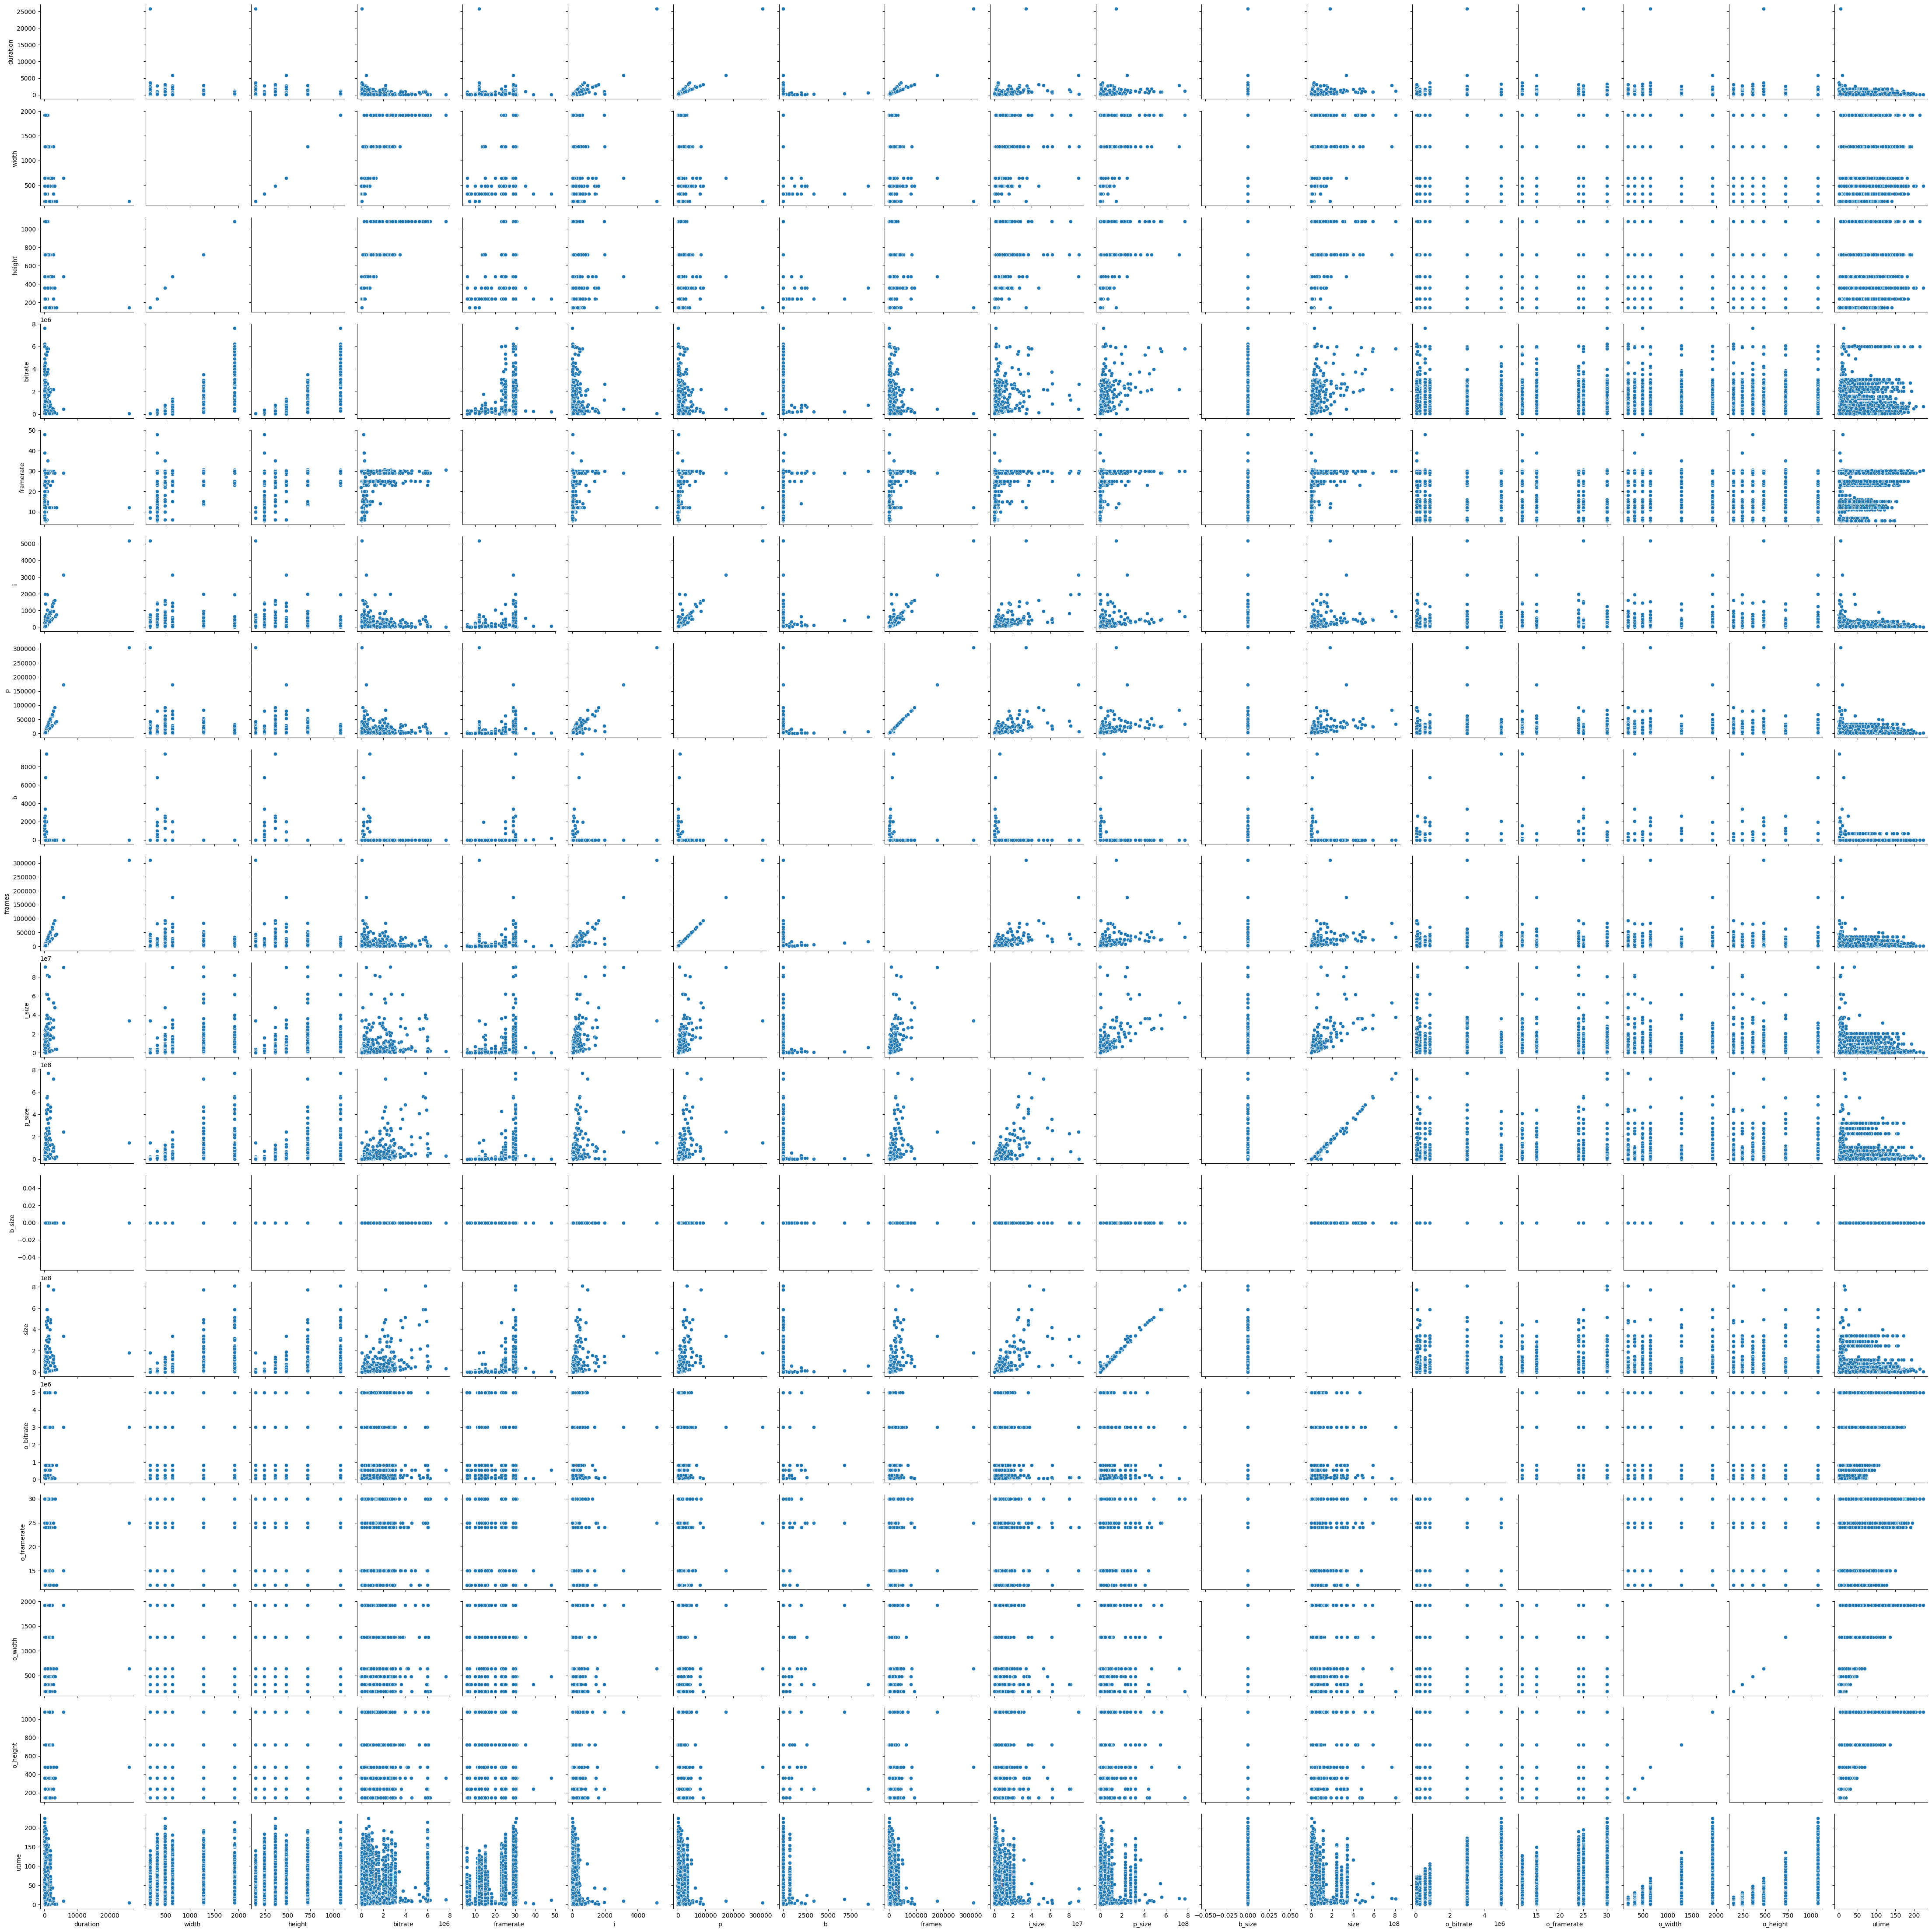

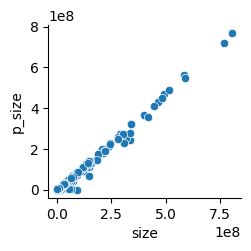

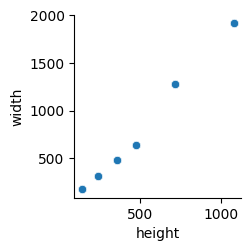

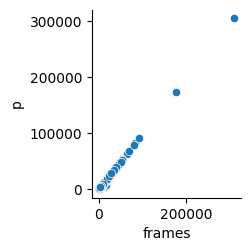

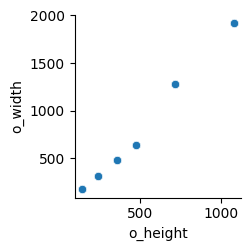

In [6]:
%matplotlib inline

import seaborn as sb

sb.pairplot(transcoding_mesurment_analiza, diag_kind="kode")
sb.pairplot(transcoding_mesurment_analiza,x_vars=['size'], y_vars=['p_size'], diag_kind="kode")
sb.pairplot(transcoding_mesurment_analiza,x_vars=['height'], y_vars=['width'], diag_kind="kode")
sb.pairplot(transcoding_mesurment_analiza,x_vars=['frames'], y_vars=['p'], diag_kind="kode")
sb.pairplot(transcoding_mesurment_analiza,x_vars=['o_height'], y_vars=['o_width'], diag_kind="kode")

Znalezione dane współzależne należy usunąć (jedno z nich). Możemy również w taki razie zauważyć jako ciekawostke że większość wideo używa w większości P-frame'ów skoro p_size i p rośnie podobnie do size i frame. Widzimy że w tych dataframie nie używano b-framów więc b i b_size prawdopodobnie będą do usunięcia.

Sprawdźmy co RFE powie nam o cechach

duration: 4
width: 2
height: 1
bitrate: 5
framerate: 1
i: 1
p: 1
b: 1
frames: 1
i_size: 8
p_size: 6
b_size: 10
size: 7
o_bitrate: 9
o_framerate: 1
o_width: 1


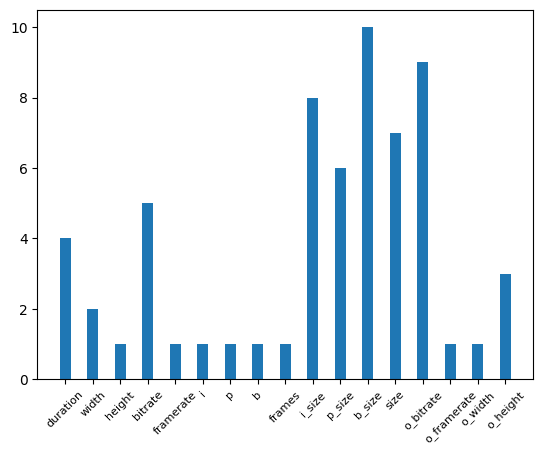

In [7]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

rfe = RFE(LinearRegression())
rfe.fit(transcoding_mesurment_analiza.drop(columns=["utime"]), transcoding_mesurment_analiza.iloc[:]['utime'])

ranking = rfe.ranking_

for x in range(0,ranking.shape[0]-1):
    print("{0}: {1}".format(transcoding_mesurment_analiza.columns[x],ranking[x]))

x_values = transcoding_mesurment_analiza.drop(columns=["utime"]).columns.to_list()

y_values = ranking.tolist()

bar_width = 0.4

plt.bar(range(len(x_values)), y_values, width=bar_width)

plt.xticks(range(len(x_values)), x_values, fontsize=8, rotation=45)

plt.show()

In [8]:
# transcoding_mesurment.drop(columns=['i_size','p_size','b_size','size', 'o_bitrate','height','o_height', 'b' ], inplace=True)

In [9]:
# sb.pairplot(transcoding_mesurment, diag_kind="kode")

Po przygotowaniu danych, nasz data frame wygląda w ten sposób:

In [10]:
transcoding_mesurment.describe()

,duration,width,height,bitrate,framerate,i,p,b,frames,i_size,p_size,b_size,size,o_bitrate,o_framerate,o_width,o_height,utime
count,68784.000000,68784.000000,68784.000000,6.878400e+04,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000,6.878400e+04,6.878400e+04,68784.0,6.878400e+04,6.878400e+04,68784.000000,68784.000000,68784.000000,68784.000000
mean,286.413921,624.934171,412.572226,6.937015e+05,23.241321,100.868312,6531.692210,9.147854,6641.708377,2.838987e+06,2.218057e+07,0.0,2.502294e+07,1.395036e+06,21.190862,802.336357,503.825541,9.996355
std,287.257650,463.169069,240.615472,1.095628e+06,7.224848,84.764791,6075.871744,92.516177,6153.342453,4.325137e+06,5.097306e+07,0.0,5.414402e+07,1.749352e+06,6.668703,609.959797,315.970438,16.107429
min,31.080000,176.000000,144.000000,8.384000e+03,5.705752,7.000000,175.000000,0.000000,192.000000,1.164800e+04,3.384500e+04,0.0,1.918790e+05,5.600000e+04,12.000000,176.000000,144.000000,0.184000
25%,106.765000,320.000000,240.000000,1.343340e+05,15.000000,39.000000,2374.000000,0.000000,2417.000000,3.933950e+05,1.851539e+06,0.0,2.258222e+06,1.090000e+05,15.000000,320.000000,240.000000,2.096000
50%,239.141660,480.000000,360.000000,2.911500e+05,25.021740,80.000000,5515.000000,0.000000,5628.000000,9.458650e+05,6.166260e+06,0.0,7.881069e+06,5.390000e+05,24.000000,480.000000,360.000000,4.408000
75%,379.320000,640.000000,480.000000,6.529670e+05,29.000000,138.000000,9155.000000,0.000000,9232.000000,3.392479e+06,1.515506e+07,0.0,1.977335e+07,3.000000e+06,25.000000,1280.000000,720.000000,10.433000
max,25844.086000,1920.000000,1080.000000,7.628466e+06,48.000000,5170.000000,304959.000000,9407.000000,310129.000000,9.082855e+07,7.689970e+08,0.0,8.067111e+08,5.000000e+06,29.970000,1920.000000,1080.000000,224.574000


Dodajemy numpy'em nową kolumną - procent p-frame'ów z całego filmiku

In [11]:
transcoding_mesurment['procent_P'] = (transcoding_mesurment['p'] / transcoding_mesurment['frames']) * 100

In [12]:
transcoding_mesurment['procent_P'].mean()

98.09308472994118

In [13]:
transcoding_mesurment.describe()

,duration,width,height,bitrate,framerate,i,p,b,frames,i_size,p_size,b_size,size,o_bitrate,o_framerate,o_width,o_height,utime,procent_P
count,68784.000000,68784.000000,68784.000000,6.878400e+04,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000,6.878400e+04,6.878400e+04,68784.0,6.878400e+04,6.878400e+04,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000
mean,286.413921,624.934171,412.572226,6.937015e+05,23.241321,100.868312,6531.692210,9.147854,6641.708377,2.838987e+06,2.218057e+07,0.0,2.502294e+07,1.395036e+06,21.190862,802.336357,503.825541,9.996355,98.093085
std,287.257650,463.169069,240.615472,1.095628e+06,7.224848,84.764791,6075.871744,92.516177,6153.342453,4.325137e+06,5.097306e+07,0.0,5.414402e+07,1.749352e+06,6.668703,609.959797,315.970438,16.107429,1.281581
min,31.080000,176.000000,144.000000,8.384000e+03,5.705752,7.000000,175.000000,0.000000,192.000000,1.164800e+04,3.384500e+04,0.0,1.918790e+05,5.600000e+04,12.000000,176.000000,144.000000,0.184000,33.620690
25%,106.765000,320.000000,240.000000,1.343340e+05,15.000000,39.000000,2374.000000,0.000000,2417.000000,3.933950e+05,1.851539e+06,0.0,2.258222e+06,1.090000e+05,15.000000,320.000000,240.000000,2.096000,97.916667
50%,239.141660,480.000000,360.000000,2.911500e+05,25.021740,80.000000,5515.000000,0.000000,5628.000000,9.458650e+05,6.166260e+06,0.0,7.881069e+06,5.390000e+05,24.000000,480.000000,360.000000,4.408000,98.225993
75%,379.320000,640.000000,480.000000,6.529670e+05,29.000000,138.000000,9155.000000,0.000000,9232.000000,3.392479e+06,1.515506e+07,0.0,1.977335e+07,3.000000e+06,25.000000,1280.000000,720.000000,10.433000,98.432909
max,25844.086000,1920.000000,1080.000000,7.628466e+06,48.000000,5170.000000,304959.000000,9407.000000,310129.000000,9.082855e+07,7.689970e+08,0.0,8.067111e+08,5.000000e+06,29.970000,1920.000000,1080.000000,224.574000,99.333333


Badanie kolejnych atrybutów

In [14]:
transcoding_mesurment.isnull().sum()

duration       0
codec          0
width          0
height         0
bitrate        0
framerate      0
i              0
p              0
b              0
frames         0
i_size         0
p_size         0
b_size         0
size           0
o_codec        0
o_bitrate      0
o_framerate    0
o_width        0
o_height       0
utime          0
procent_P      0
dtype: int64

In [15]:
(transcoding_mesurment == 0).sum()

duration           0
codec              0
width              0
height             0
bitrate            0
framerate          0
i                  0
p                  0
b              67925
frames             0
i_size             0
p_size             0
b_size         68784
size               0
o_codec            0
o_bitrate          0
o_framerate        0
o_width            0
o_height           0
utime              0
procent_P          0
dtype: int64

Histogrami i boxploty

Histogram for duration


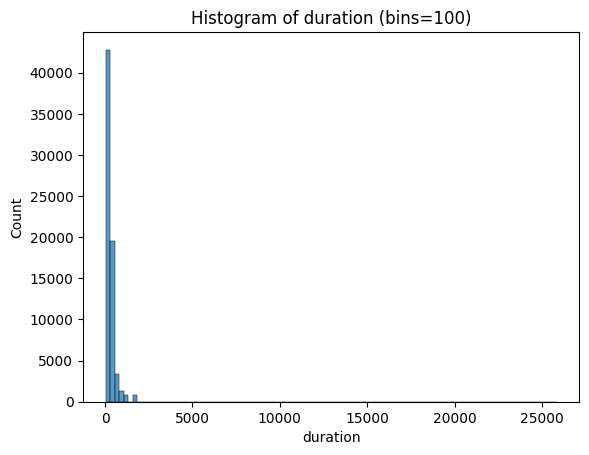

Boxplot for duration


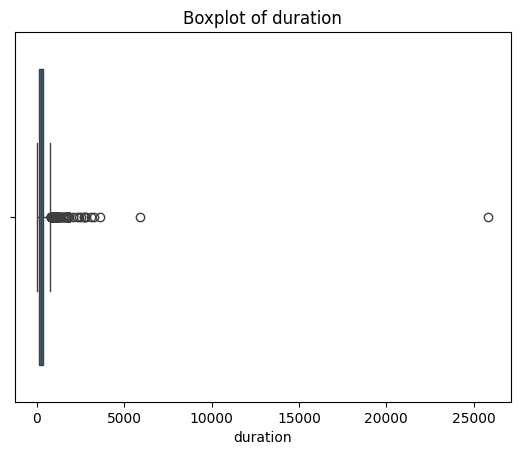

Histogram for width


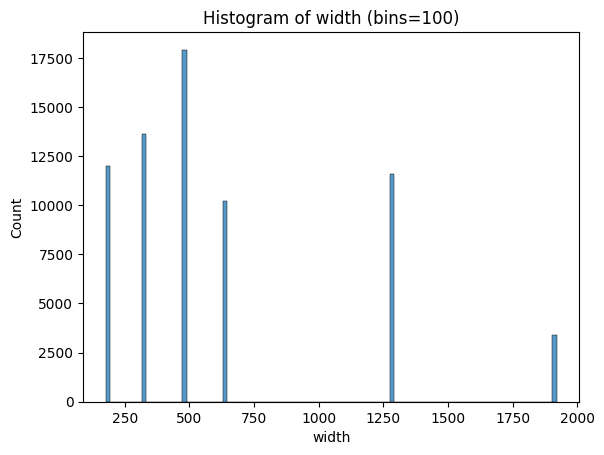

Boxplot for width


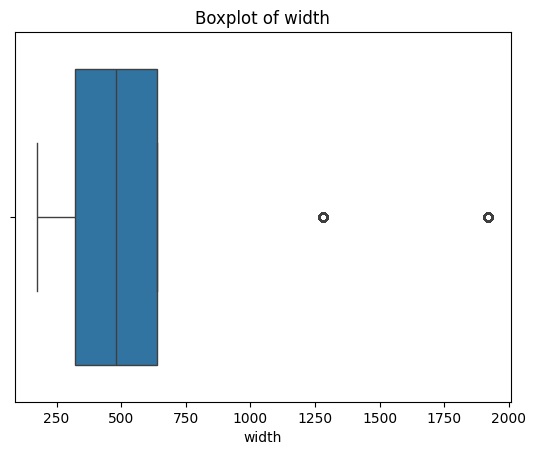

Histogram for height


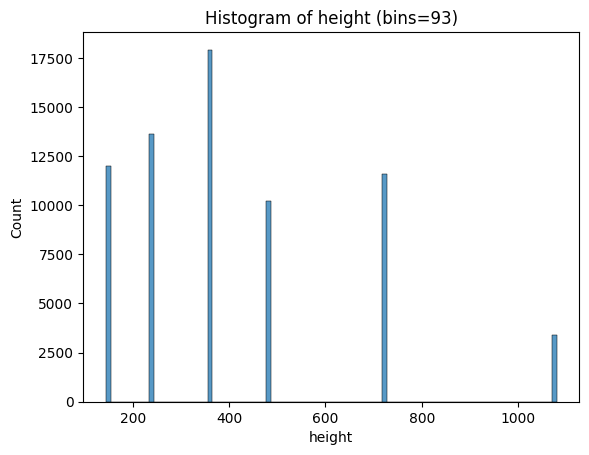

Boxplot for height


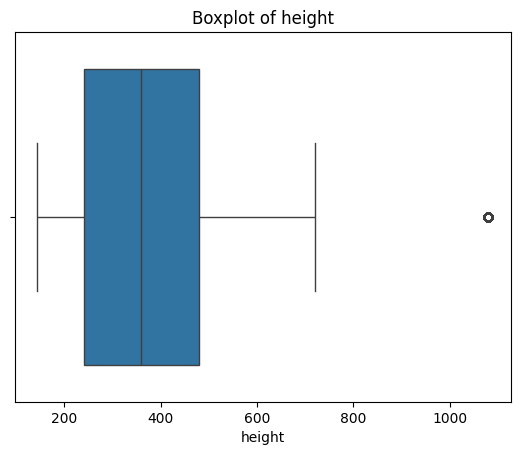

Histogram for bitrate


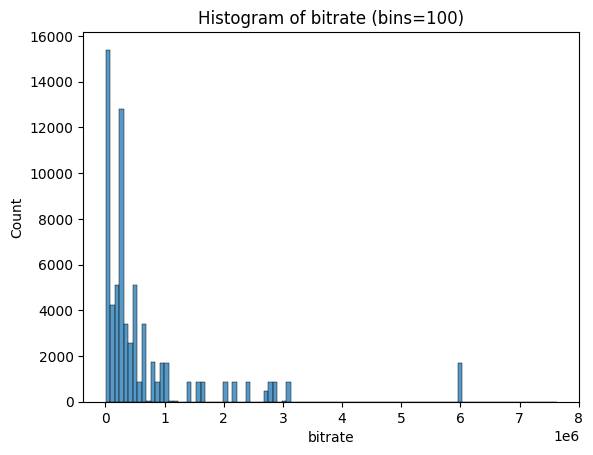

Boxplot for bitrate


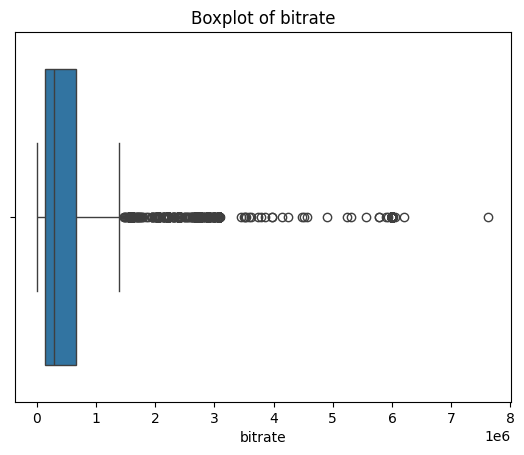

Histogram for framerate


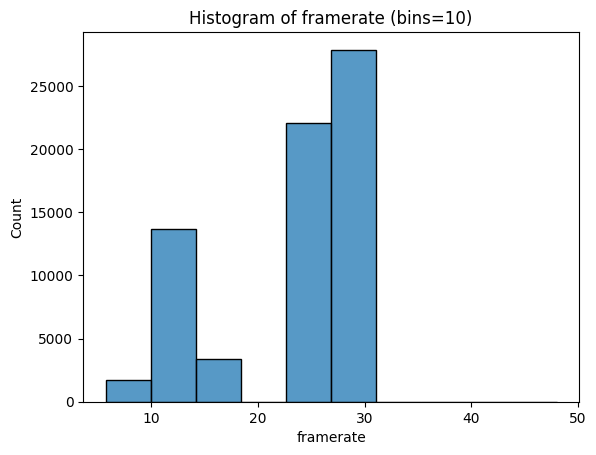

Boxplot for framerate


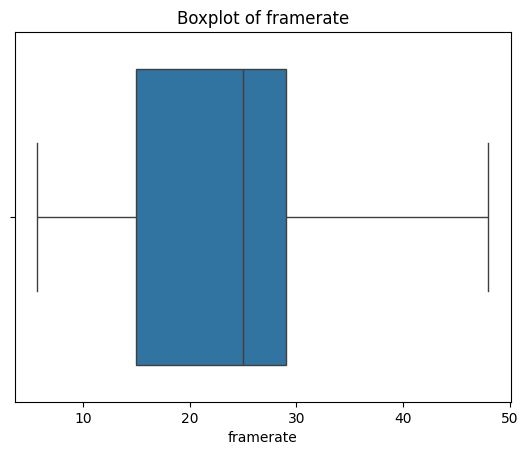

Histogram for i


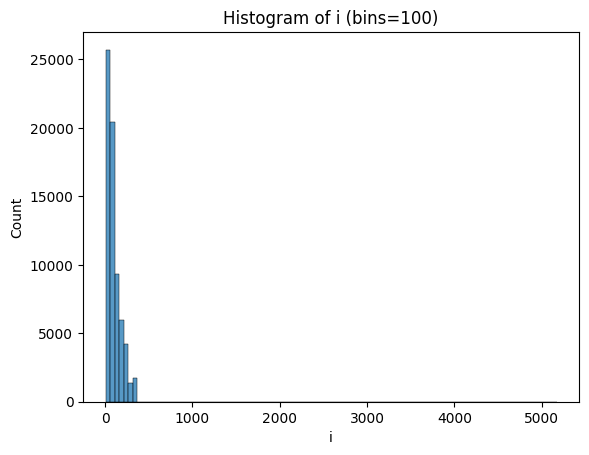

Boxplot for i


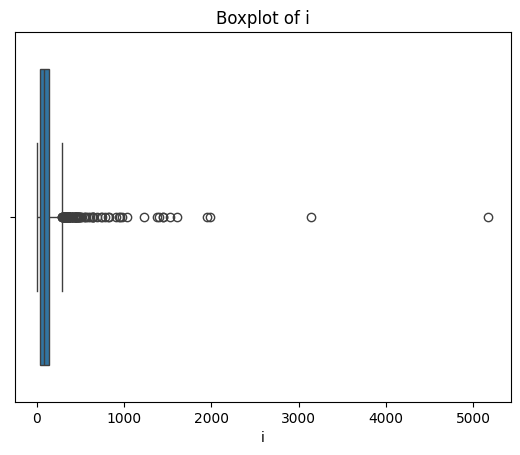

Histogram for p


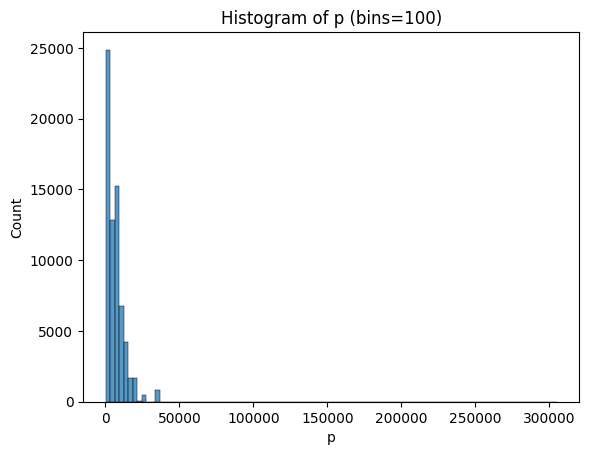

Boxplot for p


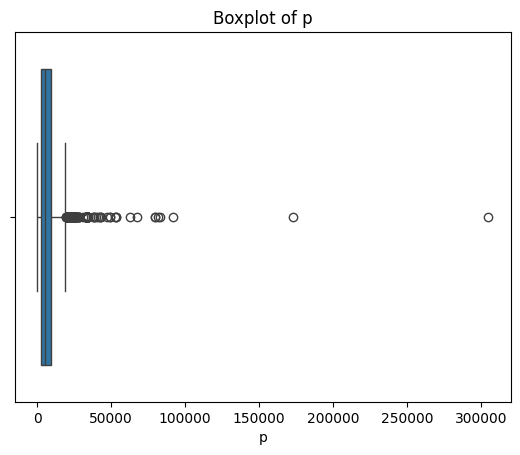

Histogram for b


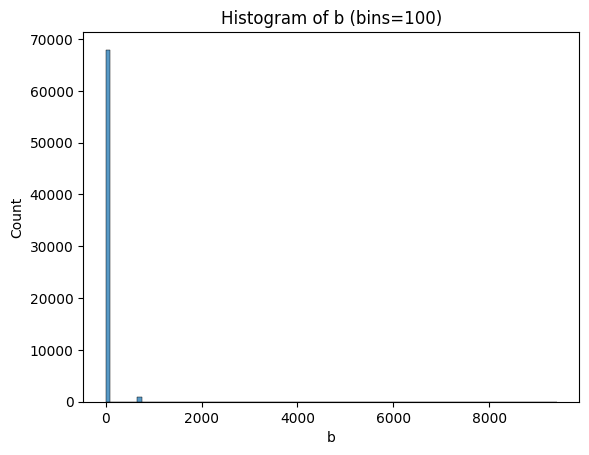

Boxplot for b


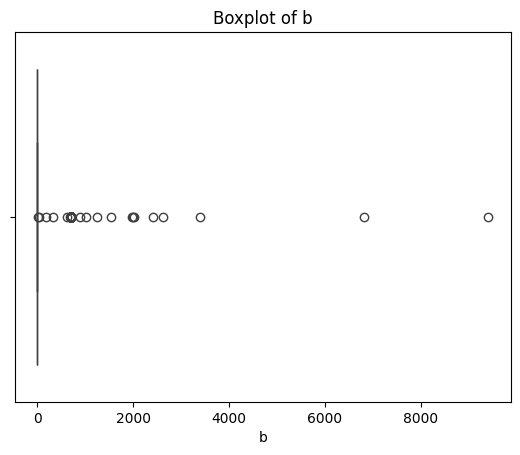

Histogram for frames


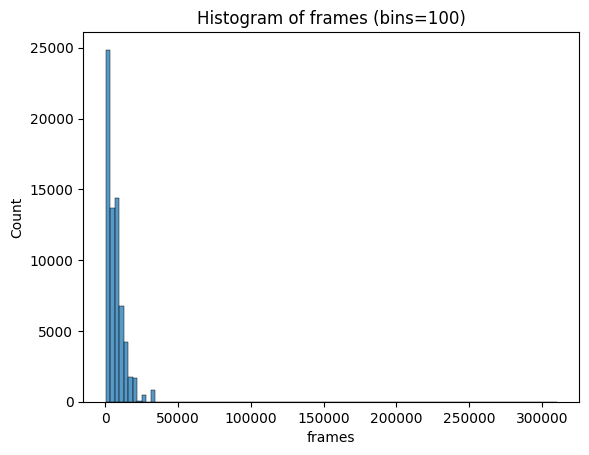

Boxplot for frames


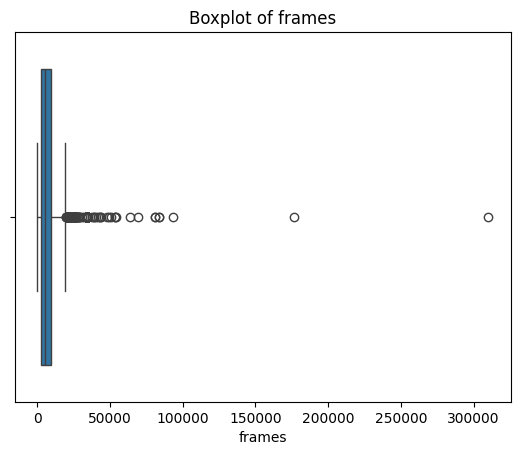

Histogram for i_size


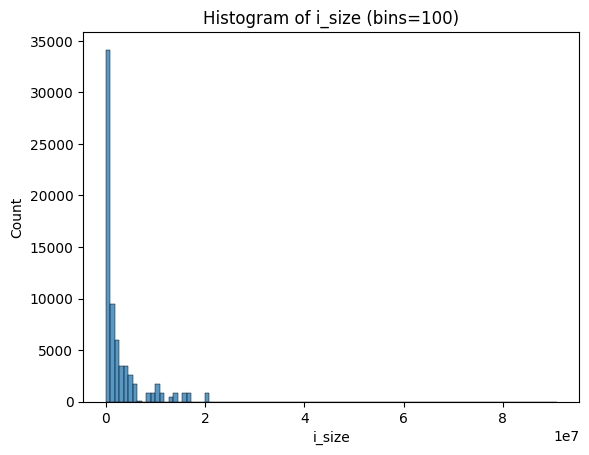

Boxplot for i_size


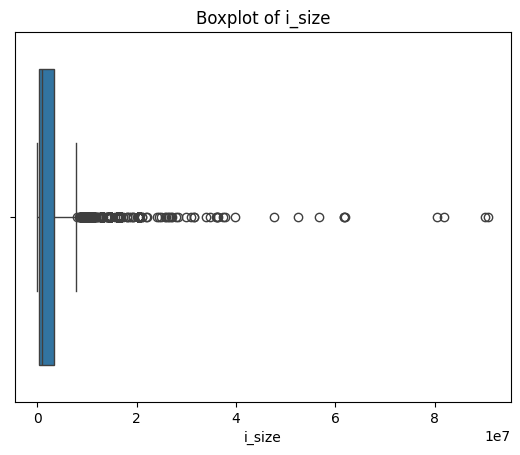

Histogram for p_size


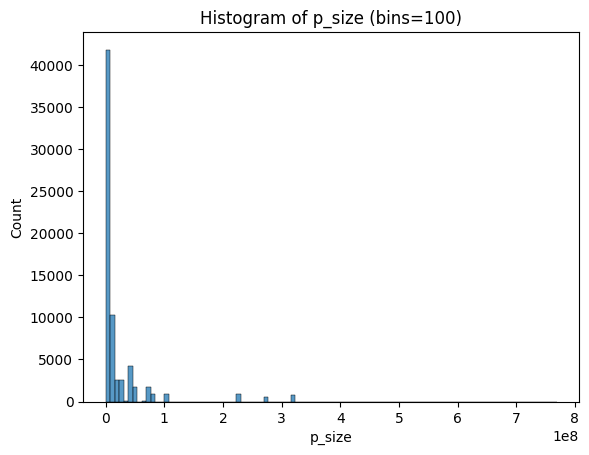

Boxplot for p_size


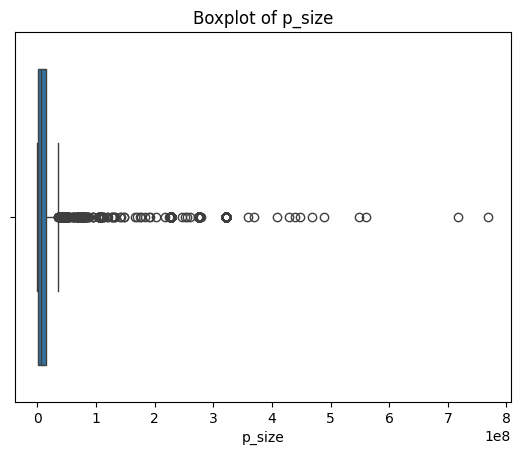

Histogram for b_size


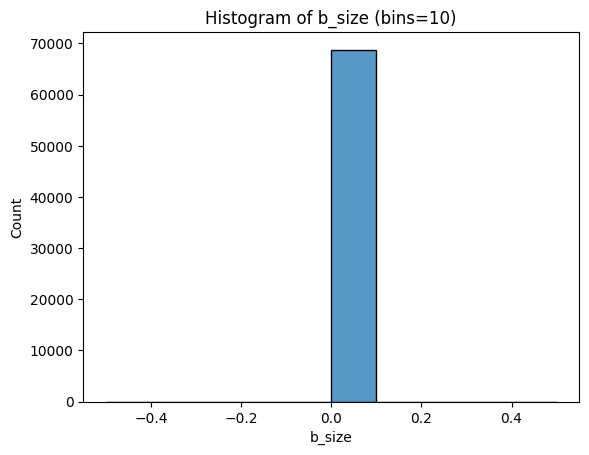

Boxplot for b_size


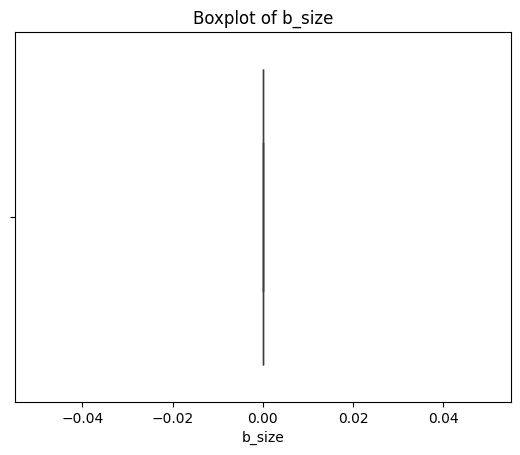

Histogram for size


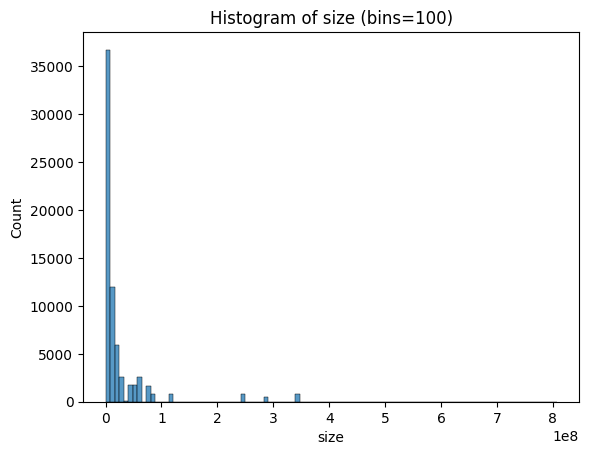

Boxplot for size


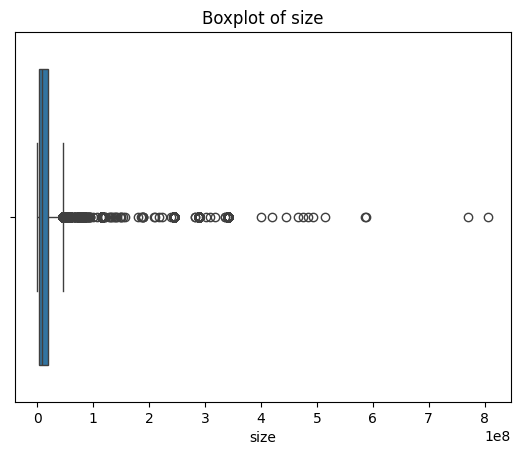

Histogram for o_bitrate


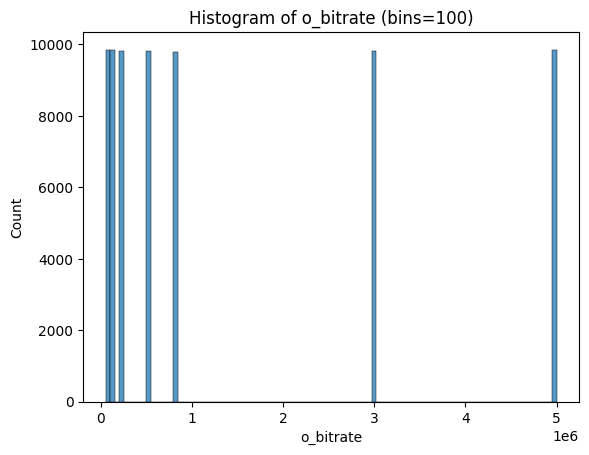

Boxplot for o_bitrate


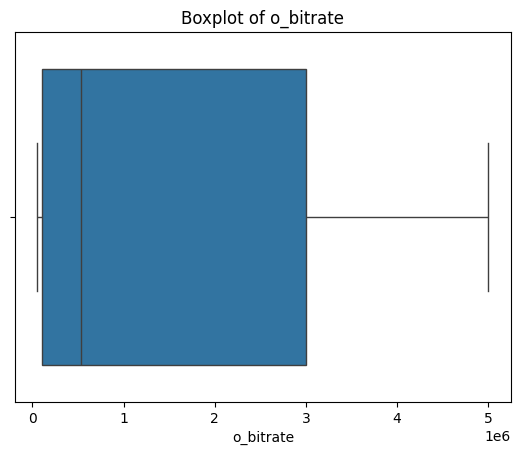

Histogram for o_framerate


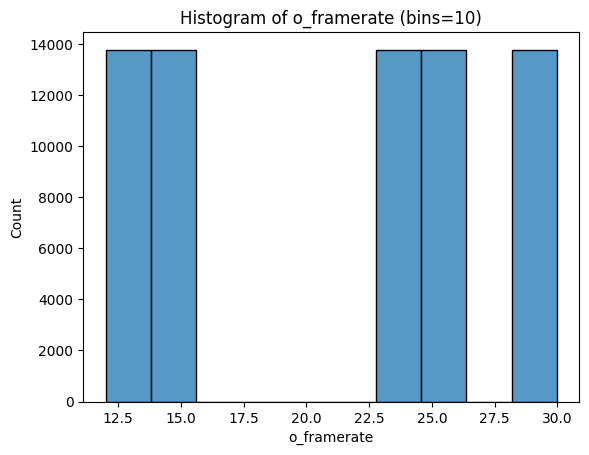

Boxplot for o_framerate


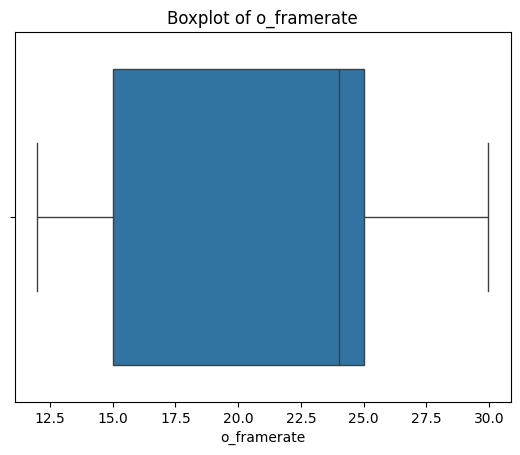

Histogram for o_width


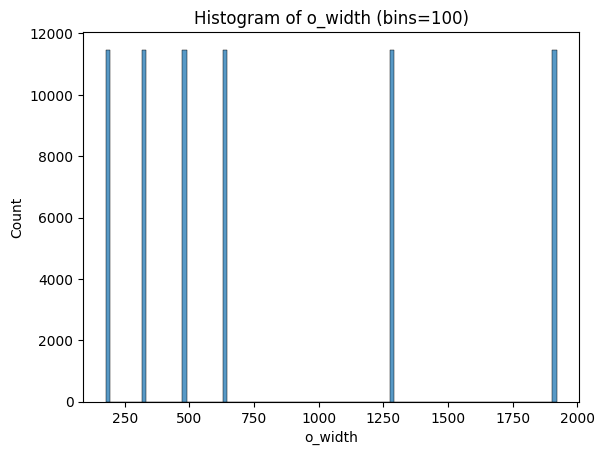

Boxplot for o_width


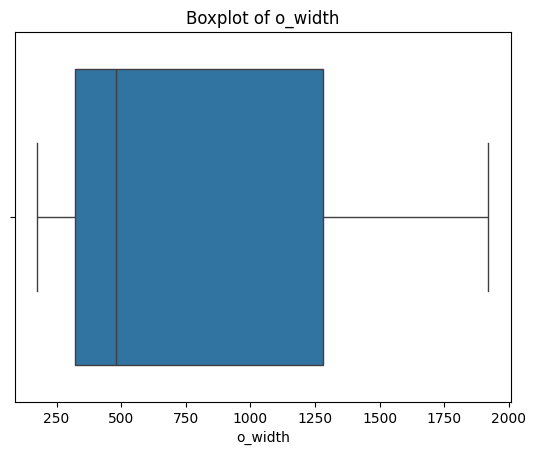

Histogram for o_height


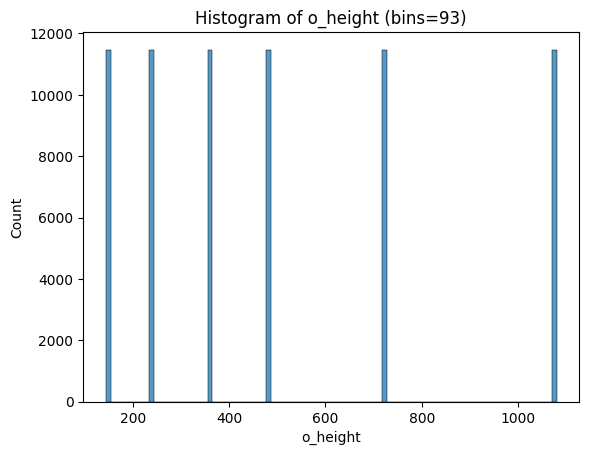

Boxplot for o_height


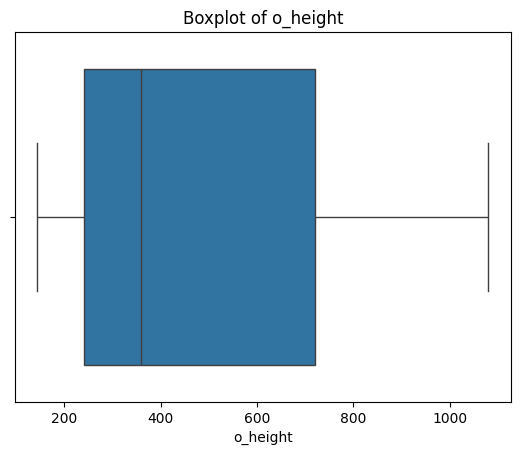

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

columns = [
    'duration', 'width', 'height', 'bitrate', 'framerate', 'i', 'p', 'b', 
    'frames', 'i_size', 'p_size', 'b_size', 'size', 'o_bitrate', 
    'o_framerate', 'o_width', 'o_height'
]

for col in columns:
    print(f"Histogram for {col}")
    
    col_range = transcoding_mesurment[col].max() - transcoding_mesurment[col].min()
    num_bins = max(10, min(100, col_range // 10)) 
    
    sns.histplot(transcoding_mesurment[col], bins=num_bins)
    plt.title(f"Histogram of {col} (bins={num_bins})")
    plt.show()
    
    print(f"Boxplot for {col}")
    sns.boxplot(x=transcoding_mesurment[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


Zauważamy duży problem z wartościami  odstającymi. Dla poprawy działania modelu prawdopodobnie będzie trzeba pozbyć się ich. 

<Axes: xlabel='duration', ylabel='utime'>

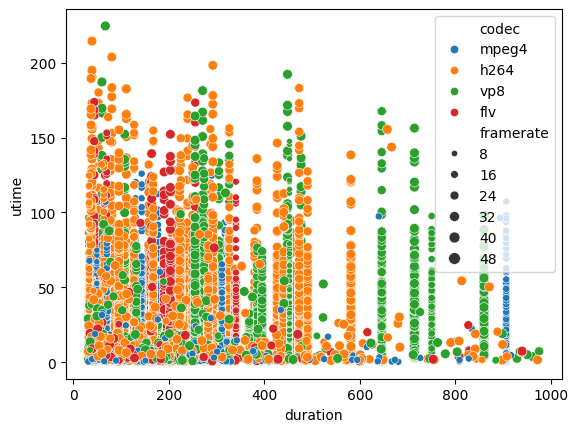

In [17]:
sns.scatterplot(x='duration', y='utime', data=transcoding_mesurment[transcoding_mesurment['duration'] < 1000], size='framerate', hue='codec')

In [18]:
transcoding_mesurment.head(5)

,duration,codec,width,height,bitrate,framerate,i,p,b,frames,...,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,utime,procent_P
0,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,...,825054,0,889537,mpeg4,56000,12.0,176,144,0.612,98.273657
1,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,...,825054,0,889537,mpeg4,56000,12.0,320,240,0.980,98.273657
2,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,...,825054,0,889537,mpeg4,56000,12.0,480,360,1.216,98.273657
3,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,...,825054,0,889537,mpeg4,56000,12.0,640,480,1.692,98.273657
4,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,...,825054,0,889537,mpeg4,56000,12.0,1280,720,3.456,98.273657


Skalowanie i standaryzacja

In [19]:
codec = transcoding_mesurment[['codec', 'o_codec']]

In [20]:
codec = pd.get_dummies(codec,columns=['codec','o_codec'])

In [21]:
transcoding_mesurment.drop(columns=['codec','o_codec'], inplace=True)

In [22]:
transcoding_mesurment.head(5)

,duration,width,height,bitrate,framerate,i,p,b,frames,i_size,p_size,b_size,size,o_bitrate,o_framerate,o_width,o_height,utime,procent_P
0,130.35667,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,56000,12.0,176,144,0.612,98.273657
1,130.35667,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,56000,12.0,320,240,0.980,98.273657
2,130.35667,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,56000,12.0,480,360,1.216,98.273657
3,130.35667,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,56000,12.0,640,480,1.692,98.273657
4,130.35667,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,56000,12.0,1280,720,3.456,98.273657


In [23]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler_min_max = MinMaxScaler()
transcoding_min_max = pd.DataFrame(scaler_min_max.fit_transform(transcoding_mesurment), columns=transcoding_mesurment.columns)

scaler_standard = StandardScaler()
transcoding_standard = pd.DataFrame(scaler_standard.fit_transform(transcoding_mesurment), columns=transcoding_mesurment.columns)

print("Skalowanie min-max:\n", transcoding_min_max.head(5))
print("\nStandaryzacja:\n", transcoding_standard.head(5))

Skalowanie min-max:
    duration  width  height   bitrate  framerate         i         p    b  \
0  0.003846    0.0     0.0  0.006064    0.14882  0.003874  0.004469  0.0   
1  0.003846    0.0     0.0  0.006064    0.14882  0.003874  0.004469  0.0   
2  0.003846    0.0     0.0  0.006064    0.14882  0.003874  0.004469  0.0   
3  0.003846    0.0     0.0  0.006064    0.14882  0.003874  0.004469  0.0   
4  0.003846    0.0     0.0  0.006064    0.14882  0.003874  0.004469  0.0   

     frames    i_size    p_size  b_size      size  o_bitrate  o_framerate  \
0  0.004427  0.000582  0.001029     0.0  0.000865        0.0          0.0   
1  0.004427  0.000582  0.001029     0.0  0.000865        0.0          0.0   
2  0.004427  0.000582  0.001029     0.0  0.000865        0.0          0.0   
3  0.004427  0.000582  0.001029     0.0  0.000865        0.0          0.0   
4  0.004427  0.000582  0.001029     0.0  0.000865        0.0          0.0   

    o_width  o_height     utime  procent_P  
0  0.000000  0

In [24]:
import numpy as np

transcoding_min_max_with_nans = transcoding_min_max.copy()

for column in transcoding_min_max_with_nans.columns:
    num_nan = int(len(transcoding_min_max_with_nans) * 0.05)
    nan_indices = np.random.choice(transcoding_min_max_with_nans.index, size=num_nan, replace=False)
    transcoding_min_max_with_nans.loc[nan_indices, column] = np.nan

print(transcoding_min_max_with_nans['width'].isna().sum())
print(transcoding_min_max_with_nans['width'].count())


3439
65345


In [25]:
transcoding_standard['width'].count()

68784

In [26]:
import numpy as np

transcoding_standard_with_nans = transcoding_standard.copy()

for column in transcoding_standard_with_nans.columns:
    num_nan = int(len(transcoding_standard_with_nans) * 0.05)
    nan_indices = np.random.choice(transcoding_standard_with_nans.index, size=num_nan, replace=False)
    transcoding_standard_with_nans.loc[nan_indices, column] = np.nan


print(transcoding_standard_with_nans['width'].isna().sum())
print(transcoding_standard_with_nans['width'].count())


3439
65345


Proste wypełnianie

In [27]:
transcoding_standard_mean_final= transcoding_standard_with_nans.apply(lambda col: col.fillna(col.mean()), axis=0)

transcoding_standard_median_final = transcoding_standard_with_nans.apply(lambda col: col.fillna(col.median()), axis=0)

print("Braki wypełnione średnią:\n", transcoding_standard_mean_final.head())
print("\nBraki wypełnione medianą:\n", transcoding_standard_median_final.head())


Braki wypełnione średnią:
    duration     width    height   bitrate  framerate         i        p  \
0 -0.543270 -0.969273 -1.116197 -0.583333  -1.555936 -0.871457 -0.82206   
1 -0.543270 -0.969273 -1.116197 -0.583333  -1.555936 -0.871457 -0.82206   
2 -0.001423 -0.969273 -1.116197 -0.583333  -1.555936 -0.871457 -0.82206   
3 -0.543270  0.000835 -1.116197 -0.583333  -1.555936 -0.871457 -0.82206   
4 -0.543270 -0.969273 -1.116197 -0.583333  -1.555936 -0.871457 -0.82206   

          b    frames    i_size   p_size  b_size      size  o_bitrate  \
0 -0.098879 -0.825201 -0.641488 -0.41896     0.0 -0.445729  -0.765453   
1 -0.098879 -0.825201 -0.641488 -0.41896     0.0 -0.445729  -0.765453   
2 -0.098879 -0.825201 -0.641488 -0.41896     0.0 -0.445729  -0.765453   
3 -0.098879 -0.825201 -0.641488 -0.41896     0.0 -0.445729  -0.765453   
4 -0.098879 -0.825201 -0.641488 -0.41896     0.0 -0.445729  -0.765453   

   o_framerate   o_width  o_height     utime  procent_P  
0    -1.378218 -1.026856 

In [28]:
transcoding_min_max_mean_final= transcoding_min_max_with_nans.apply(lambda col: col.fillna(col.mean()), axis=0)

transcoding_min_max_median_final = transcoding_min_max_with_nans.apply(lambda col: col.fillna(col.median()), axis=0)

print("Braki wypełnione średnią:\n", transcoding_standard_mean_final.head())
print("\nBraki wypełnione medianą:\n", transcoding_standard_median_final.head())

Braki wypełnione średnią:
    duration     width    height   bitrate  framerate         i        p  \
0 -0.543270 -0.969273 -1.116197 -0.583333  -1.555936 -0.871457 -0.82206   
1 -0.543270 -0.969273 -1.116197 -0.583333  -1.555936 -0.871457 -0.82206   
2 -0.001423 -0.969273 -1.116197 -0.583333  -1.555936 -0.871457 -0.82206   
3 -0.543270  0.000835 -1.116197 -0.583333  -1.555936 -0.871457 -0.82206   
4 -0.543270 -0.969273 -1.116197 -0.583333  -1.555936 -0.871457 -0.82206   

          b    frames    i_size   p_size  b_size      size  o_bitrate  \
0 -0.098879 -0.825201 -0.641488 -0.41896     0.0 -0.445729  -0.765453   
1 -0.098879 -0.825201 -0.641488 -0.41896     0.0 -0.445729  -0.765453   
2 -0.098879 -0.825201 -0.641488 -0.41896     0.0 -0.445729  -0.765453   
3 -0.098879 -0.825201 -0.641488 -0.41896     0.0 -0.445729  -0.765453   
4 -0.098879 -0.825201 -0.641488 -0.41896     0.0 -0.445729  -0.765453   

   o_framerate   o_width  o_height     utime  procent_P  
0    -1.378218 -1.026856 

<!-- 1.
są głównie filmy 30 klatek i 26
bitrate lekko rośnie z ilością klatek

2.
liniowa zależność pomiędzy wielkością obrazu a bitrate

3.
długość materiału nie ma wpływu na bitrate

4.
im dłuższy film tym niższy bitrate

5.
im dłuższy film tym większy jego rozmiar -->

In [29]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5)

transcoding_min_max_knn_final = pd.DataFrame(knn_imputer.fit_transform(transcoding_min_max_with_nans), columns=transcoding_min_max_with_nans.columns)

print("Braki wypełnione za pomocą KNN:\n", transcoding_min_max_knn_final.head())

Braki wypełnione za pomocą KNN:
    duration  width  height   bitrate  framerate         i         p    b  \
0  0.003846    0.0     0.0  0.006064    0.14882  0.003874  0.004469  0.0   
1  0.003846    0.0     0.0  0.006064    0.14882  0.003874  0.004469  0.0   
2  0.003846    0.0     0.0  0.006064    0.14882  0.003874  0.004469  0.0   
3  0.003846    0.0     0.0  0.006064    0.14882  0.003874  0.004469  0.0   
4  0.003846    0.0     0.0  0.006064    0.14882  0.003874  0.004469  0.0   

     frames    i_size    p_size  b_size      size  o_bitrate  o_framerate  \
0  0.004427  0.000582  0.001029     0.0  0.000865        0.0          0.0   
1  0.004427  0.000582  0.001029     0.0  0.000865        0.0          0.0   
2  0.004427  0.000582  0.001029     0.0  0.000865        0.0          0.0   
3  0.004427  0.000582  0.001029     0.0  0.000865        0.0          0.0   
4  0.004427  0.000582  0.001029     0.0  0.000865        0.0          0.0   

    o_width  o_height     utime  procent_P  
0 

In [30]:
transcoding_standard_knn_final = pd.DataFrame(knn_imputer.fit_transform(transcoding_standard_with_nans), columns=transcoding_standard_with_nans.columns)

print("Braki wypełnione za pomocą KNN:\n", transcoding_standard_knn_final.head())

Braki wypełnione za pomocą KNN:
    duration     width    height   bitrate  framerate         i        p  \
0 -0.543270 -0.969273 -1.116197 -0.583333  -1.555936 -0.871457 -0.82206   
1 -0.543270 -0.969273 -1.116197 -0.583333  -1.555936 -0.871457 -0.82206   
2 -0.540069 -0.969273 -1.116197 -0.583333  -1.555936 -0.871457 -0.82206   
3 -0.543270 -0.969273 -1.116197 -0.583333  -1.555936 -0.871457 -0.82206   
4 -0.543270 -0.969273 -1.116197 -0.583333  -1.555936 -0.871457 -0.82206   

          b    frames    i_size   p_size  b_size      size  o_bitrate  \
0 -0.098879 -0.825201 -0.641488 -0.41896     0.0 -0.445729  -0.765453   
1 -0.098879 -0.825201 -0.641488 -0.41896     0.0 -0.445729  -0.765453   
2 -0.098879 -0.825201 -0.641488 -0.41896     0.0 -0.445729  -0.765453   
3 -0.098879 -0.825201 -0.641488 -0.41896     0.0 -0.445729  -0.765453   
4 -0.098879 -0.825201 -0.641488 -0.41896     0.0 -0.445729  -0.765453   

   o_framerate   o_width  o_height     utime  procent_P  
0    -1.378218 -1.0

In [31]:
transcoding_min_max_mean_final = transcoding_min_max_mean_final.join(codec)
transcoding_min_max_median_final = transcoding_min_max_median_final.join(codec)
transcoding_min_max_knn_final = transcoding_min_max_knn_final.join(codec)
transcoding_standard_mean_final = transcoding_standard_mean_final.join(codec)
transcoding_standard_median_final = transcoding_standard_median_final.join(codec)
transcoding_standard_knn_final = transcoding_standard_knn_final.join(codec)